['x action', 'y action', 'z action', 'roll action', 'pitch action', 'yaw action', 'x gripper', 'y gripper', 'z gripper', 'roll gripper', 'pitch gripper', 'yaw gripper', 'x velocity gripper', 'y velocity gripper', 'z velocity gripper', 'x target', 'y target', 'z target', 'roll target', 'pitch target', 'yaw target', 'x velocity target', 'y velocity target', 'z velocity target', 'closest distance', 'contact force', 'rewards']
(501, 27)


Text(0.5, 0, 'timestep')

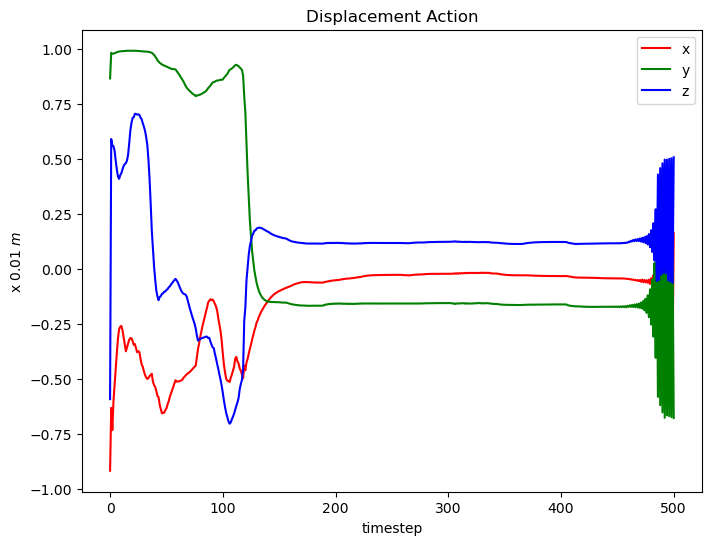

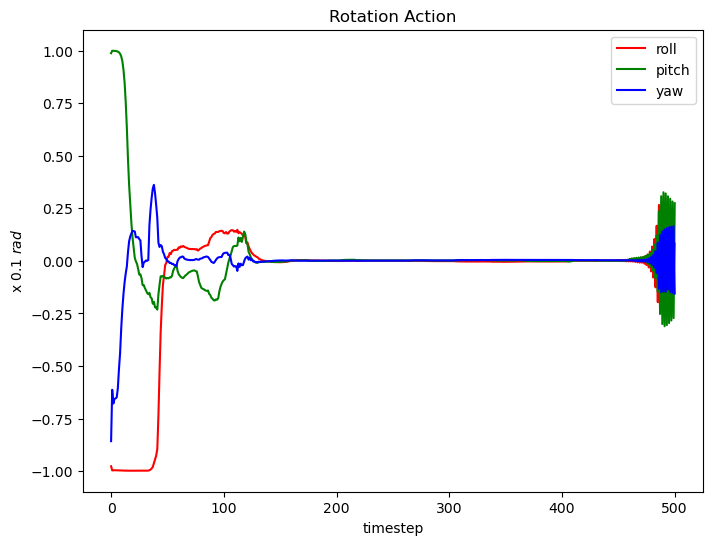

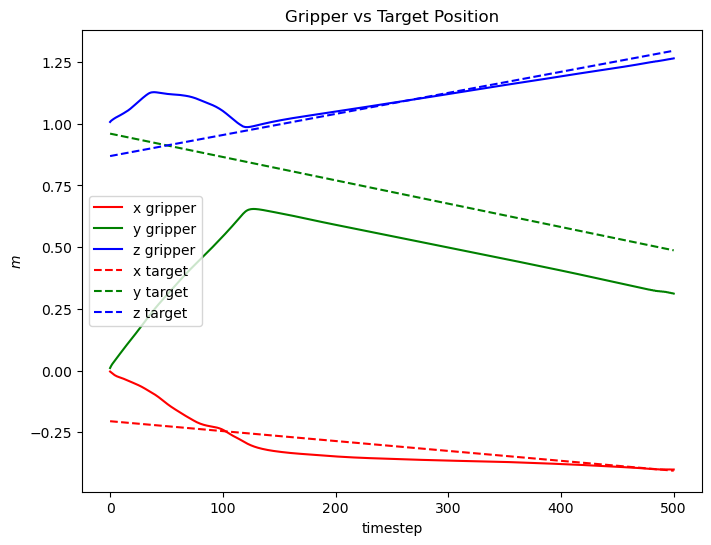

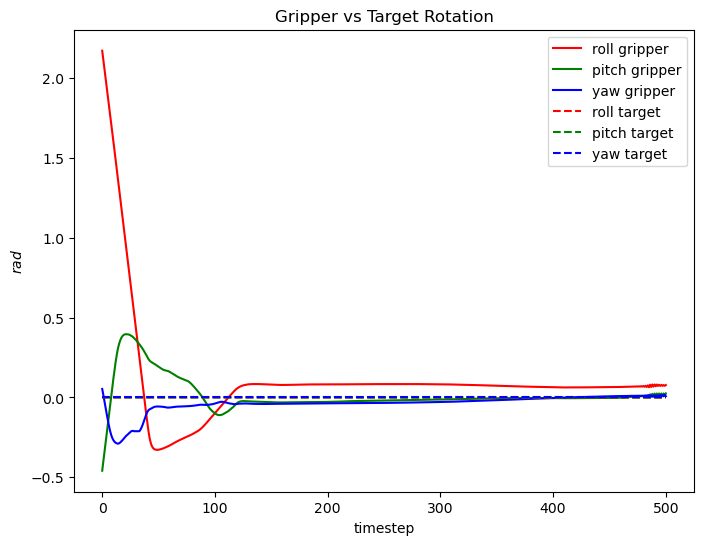

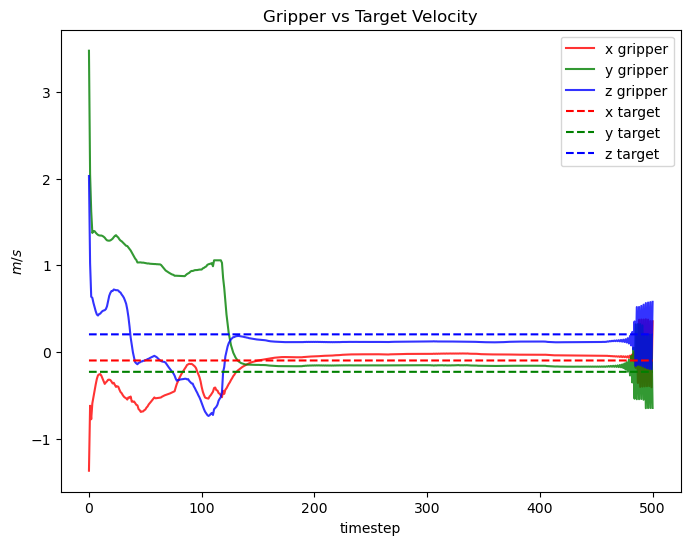

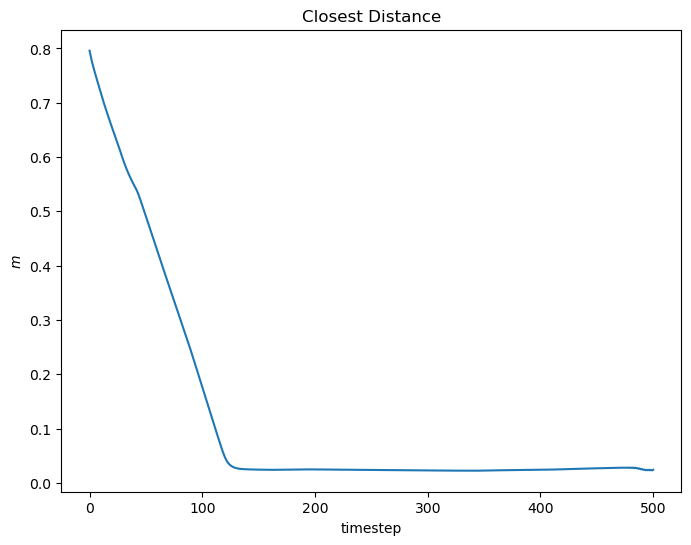

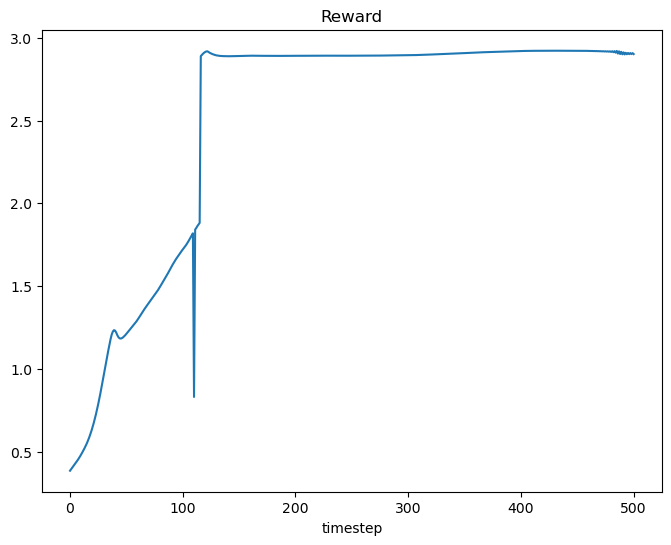

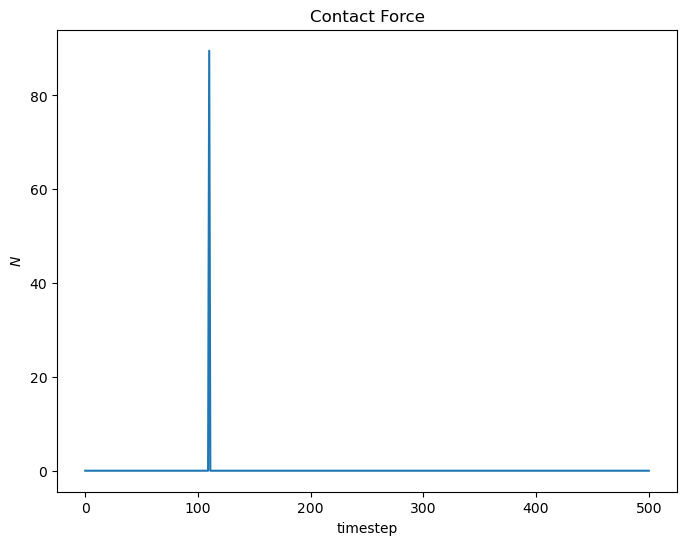

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys

# Read data
header = pd.read_csv('output_data1.csv', nrows=0).columns.tolist()
db = pd.read_csv('output_data11.csv',header=0)
db.columns = header
print(header)
print(db.shape)

# Plot
plt.figure(figsize=(8,6))
plt.plot(db["x action"], color='r')
plt.plot(db["y action"], color='g')
plt.plot(db["z action"], color='b')
plt.title('Displacement Action')
plt.ylabel('x 0.01 $m$')
plt.xlabel('timestep')
plt.legend(['x', 'y', 'z'])

plt.figure(figsize=(8,6))
plt.plot(db["roll action"], color='r')
plt.plot(db["pitch action"], color='g')
plt.plot(db["yaw action"], color='b')
plt.title('Rotation Action')
plt.ylabel('x 0.1 $rad$')
plt.xlabel('timestep')
plt.legend(['roll', 'pitch', 'yaw'])

plt.figure(figsize=(8,6))
plt.plot(db["x gripper"], color='r')
plt.plot(db["y gripper"], color='g')
plt.plot(db["z gripper"], color='b')
plt.plot(db["x target"], linestyle='--', color='r')
plt.plot(db["y target"], linestyle='--', color='g')
plt.plot(db["z target"], linestyle='--', color='b')
plt.title('Gripper vs Target Position')
plt.ylabel('$m$')
plt.xlabel('timestep')
plt.legend(['x gripper', 'y gripper', 'z gripper', 'x target', 'y target', 'z target'])

plt.figure(figsize=(8,6))
plt.plot(db["roll gripper"], color='r')
plt.plot(db["pitch gripper"], color='g')
plt.plot(db["yaw gripper"], color='b')
plt.plot(db["roll target"], linestyle='--', color='r')
plt.plot(db["pitch target"], linestyle='--', color='g')
plt.plot(db["yaw target"], linestyle='--', color='b')
plt.title('Gripper vs Target Rotation')
plt.ylabel('$rad$')
plt.xlabel('timestep')
plt.legend(['roll gripper', 'pitch gripper', 'yaw gripper', 'roll target', 'pitch target', 'yaw target'])

plt.figure(figsize=(8,6))
plt.plot(db["x velocity gripper"], color='r', alpha=0.8)
plt.plot(db["y velocity gripper"], color='g', alpha=0.8)
plt.plot(db["z velocity gripper"], color='b', alpha=0.8)
plt.plot(db["x velocity target"], linestyle='--', color='r')
plt.plot(db["y velocity target"], linestyle='--', color='g')
plt.plot(db["z velocity target"], linestyle='--', color='b')
plt.title('Gripper vs Target Velocity')
plt.ylabel('$m/s$')
plt.xlabel('timestep')
plt.legend(['x gripper', 'y gripper', 'z gripper', 'x target', 'y target', 'z target'])

plt.figure(figsize=(8,6))
plt.plot(db["closest distance"])
plt.title('Closest Distance')
plt.ylabel('$m$')
plt.xlabel('timestep')

plt.figure(figsize=(8,6))
plt.plot(db["rewards"])
plt.title('Reward')
# plt.ylabel('x 10mm')
plt.xlabel('timestep')

plt.figure(figsize=(8,6))
plt.plot(db["contact force"])
plt.title('Contact Force')
plt.ylabel('$N$')
plt.xlabel('timestep')
